In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

# --------------------------------------------------------  đừng care mấy cái libs này, a thêm chơi cho vui thôi :))      -----------------------------------------------------------------
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error, accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support # Cái này sẽ dùng để đánh giá model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA  
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.mixture import GaussianMixture
from mlxtend.frequent_patterns import apriori, association_rules  
from mlxtend.preprocessing import TransactionEncoder
from pandas_profiling import ProfileReport
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from scipy.stats.stats import pearsonr
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import svm
from sklearn.svm import SVR
from scipy.integrate import odeint
import xgboost as xgb
from wordcloud import WordCloud,STOPWORDS
# ----------------------------------------------------------  Cái đống này là dùng để build model, task 3 a sẽ dùng, nên cứ add trước cho khỏe :3 ------------------------------------------

import os, sys, glob, datetime, warnings
from google.colab import files, drive
warnings.filterwarnings("ignore")
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_new = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv",  parse_dates=['date'], index_col='date')
df_new.tail()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-07-02,ZWE,Africa,Zimbabwe,52663.0,1442.0,1063.714,1841.0,33.0,17.143,3543.246,97.020,71.568,123.865,2.220,1.153,1.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1352718.0,788004.0,564714.0,10758.0,18686.0,9.10,5.30,3.80,1257.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
2021-07-03,ZWE,Africa,Zimbabwe,53665.0,1002.0,1092.429,1859.0,18.0,19.143,3610.662,67.416,73.500,125.076,1.211,1.288,1.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1359587.0,791901.0,567686.0,6869.0,15726.0,9.15,5.33,3.82,1058.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
2021-07-04,ZWE,Africa,Zimbabwe,54474.0,809.0,1147.429,1878.0,19.0,20.286,3665.092,54.431,77.201,126.355,1.278,1.365,1.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1361210.0,793077.0,568133.0,1623.0,12279.0,9.16,5.34,3.82,826.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
2021-07-05,ZWE,Africa,Zimbabwe,56014.0,1540.0,1247.143,1911.0,33.0,23.143,3768.706,103.614,83.910,128.575,2.220,1.557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1369436.0,797715.0,571721.0,8226.0,10040.0,9.21,5.37,3.85,676.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
2021-07-06,ZWE,Africa,Zimbabwe,57963.0,1949.0,1347.143,1939.0,28.0,25.429,3899.837,131.132,90.638,130.459,1.884,1.711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [ ]:
#SELECT COUNTRY
country = "United States"

In [ ]:
df = df_new[["new_cases_smoothed"]].where(df_new['location']==country).dropna()
df

,new_cases_smoothed
date,
2020-01-28,0.571
2020-01-29,0.714
2020-01-30,0.714
2020-01-31,0.857
2020-02-01,0.857
...,...
2021-07-02,13589.857
2021-07-03,13223.571
2021-07-04,13191.714


In [ ]:
start_time = '2021-04-01'
end_time = '2021-06-15'
train = df.loc[start_time:end_time]  # train & test split
test = df.loc[end_time:]

In [ ]:
Y_train = np.array(train.values)
Y_test = np.array(test.values)
X_train = []
X_test = []
index = 0
while(index < train.shape[0]):
  X_train.append(index)
  index += 1

while(index < test.shape[0]+train.shape[0]):
  X_test.append(index)
  index += 1


In [ ]:
x0_train = np.array(X_train).reshape(-1,1)
x0_test = np.array(X_test).reshape(-1,1)
y0_train = np.array(Y_train).reshape(-1,1)
y0_test = np.array(Y_test).reshape(-1,1)

#Linear Regression

In [ ]:
model = LinearRegression()
model.fit(x0_train,y0_train)
y_predict = model.predict(x0_test)

In [ ]:
print(model.score(x0_train, y0_train))
print(model.score(x0_test, y0_test))
print(model.score(y_predict, y0_test))

0.9556698062289636
-435.55679645590925
-55679159.797573015


In [ ]:
print(np.sqrt(mean_squared_error(y_predict, y0_test)))
print(mean_squared_error(y_predict, y0_test))

16077.154723016743
258474903.98781955


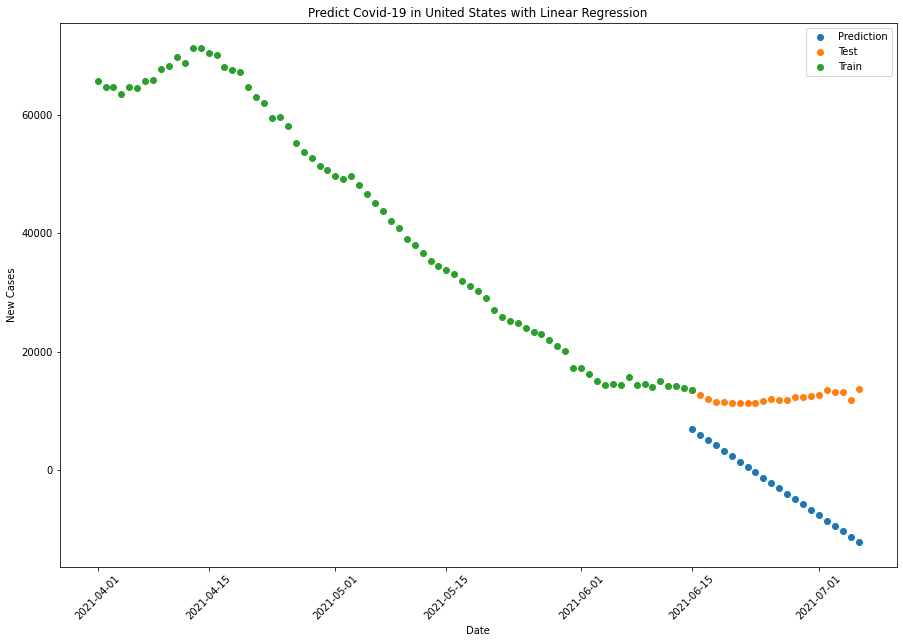

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Predict Covid-19 in " + country + " with Linear Regression")
plt.scatter(test.index,y_predict, label='Prediction')
plt.scatter(test.index,y0_test, label='Test')
plt.scatter(train.index,y0_train, label='Train')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend(loc="best")
plt.xticks(rotation=45)
plt.legend()
plt.savefig("linear_regression.png")
plt.show()

#Support Vector Machine

In [ ]:
svr_rbf = SVR(kernel='rbf')
svr_lin = SVR(kernel='linear')
svr_poly = SVR(kernel='poly')

In [ ]:
svr_rbf.fit(x0_train, y0_train)
yhat_rbf = svr_rbf.predict(x0_test)
yhat_rbf

array([41509.42293688, 41510.33605816, 41511.25581575, 41512.17647077,
       41513.09258722, 41513.99906863, 41514.89119023, 41515.76462623,
       41516.61547179, 41517.4402594 , 41518.23596945, 41519.00003489,
       41519.73034011, 41520.42521406, 41521.08341808, 41521.70412865,
       41522.28691569, 41522.83171686, 41523.33880868, 41523.80877487,
       41524.24247294, 41524.64099944])

In [ ]:
svr_lin.fit(x0_train,y0_train)
yhat_lin = svr_lin.predict(x0_test)
yhat_lin

array([11285.10340299, 10534.10425373,  9783.10510448,  9032.10595522,
        8281.10680597,  7530.10765672,  6779.10850746,  6028.10935821,
        5277.11020896,  4526.1110597 ,  3775.11191045,  3024.11276119,
        2273.11361194,  1522.11446269,   771.11531343,    20.11616418,
        -730.88298507, -1481.88213433, -2232.88128358, -2983.88043284,
       -3734.87958209, -4485.87873134])

In [ ]:
svr_poly.fit(x0_train,y0_train)
yhat_poly = svr_poly.predict(x0_test)
yhat_poly

array([ 16807.58075727,  15683.81400623,  14530.47613034,  13347.18308902,
        12133.55084168,  10889.19534775,   9613.73256664,   8306.77845776,
         6967.94898055,   5596.8600944 ,   4193.12775875,   2756.367933  ,
         1286.19657659,   -217.77035109,  -1755.9168906 ,  -3328.62708254,
        -4936.28496748,  -6579.274586  ,  -8257.9799787 ,  -9972.78518614,
       -11724.07424892, -13512.23120762])

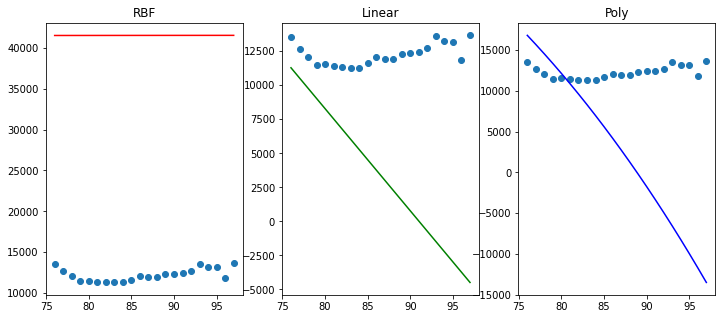

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.plot(x0_test,yhat_rbf, color='r')
plt.scatter(x0_test,y0_test)
plt.title("RBF")
plt.subplot(1,3,2)
plt.plot(x0_test,yhat_lin, color='g')
plt.scatter(x0_test,y0_test)
plt.title("Linear")
plt.subplot(1,3,3)
plt.plot(x0_test,yhat_poly, color='b')
plt.scatter(x0_test,y0_test)
plt.title("Poly")
plt.savefig("RBF_Linear_Poly.png")
plt.show()

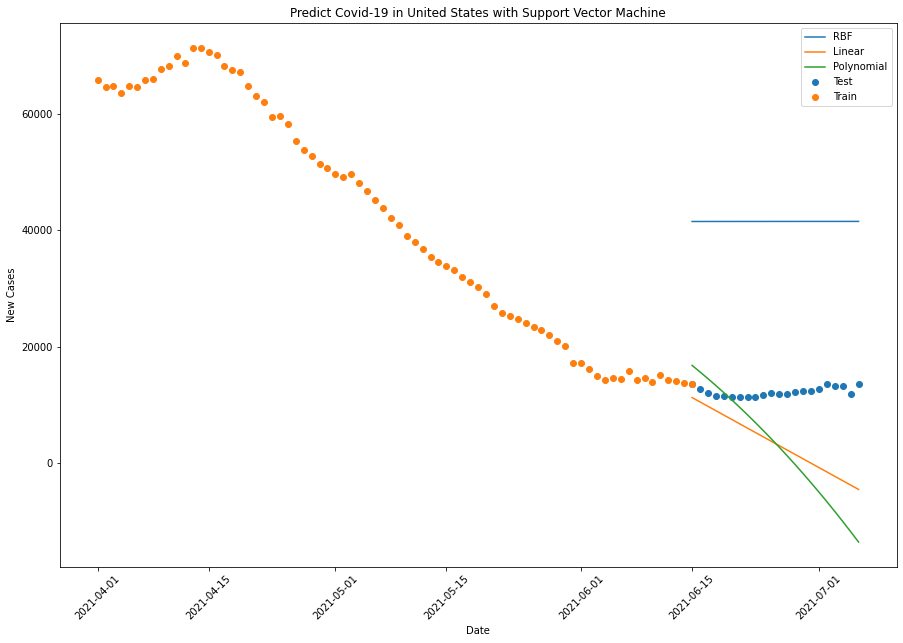

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Predict Covid-19 in " + country + " with Support Vector Machine")
plt.plot(test.index,yhat_rbf , label='RBF')
plt.plot(test.index,yhat_lin, label='Linear')
plt.plot(test.index,yhat_poly , label='Polynomial')
plt.scatter(test.index,y0_test, label='Test')
plt.scatter(train.index,y0_train, label='Train')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend(loc="best")
plt.xticks(rotation=45)
plt.legend()
plt.savefig("SVM_model.png")
plt.show()

#KNN Test

In [ ]:
list_k = []
list_r_score = []
for K_value in range(2,int(y0_train.shape[0]**0.5)):
  list_k.append(K_value)
  neigh = KNeighborsRegressor(n_neighbors = K_value)
  neigh.fit(x0_train, y0_train)
  score = neigh.score(x0_test,y0_test)*100
  list_r_score.append(score)
  print("The R^2 score is ", score, " for K-Value:",K_value)
position = list_r_score.index(max(list_r_score))
k = list_k[position]
print("\nThe optimal number of neighbors is:", k, "with R^2 score is:",
list_r_score[position])

The R^2 score is  -410.35289413006774  for K-Value: 2
The R^2 score is  -511.70497754288505  for K-Value: 3
The R^2 score is  -581.0708102939277  for K-Value: 4
The R^2 score is  -740.9629369816585  for K-Value: 5
The R^2 score is  -714.7546157228646  for K-Value: 6

The optimal number of neighbors is: 2 with R^2 score is: -410.35289413006774


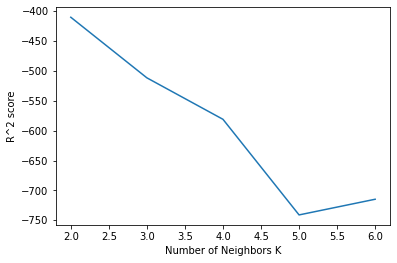

In [ ]:
plt.plot(list_k, list_r_score)
plt.xlabel('Number of Neighbors K')
plt.ylabel('R^2 score')
plt.show()

In [ ]:
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(x0_train, y0_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

In [ ]:
y_knn_pred = knn.predict(x0_test)
y_knn_pred

array([[13964.214],
       [13964.214],
       [13964.214],
       [13964.214],
       [13964.214],
       [13964.214],
       [13964.214],
       [13964.214],
       [13964.214],
       [13964.214],
       [13964.214],
       [13964.214],
       [13964.214],
       [13964.214],
       [13964.214],
       [13964.214],
       [13964.214],
       [13964.214],
       [13964.214],
       [13964.214]])

#Decision Tree Test

In [ ]:
dtr = RandomForestRegressor()
model_dtr = dtr.fit(x0_train, y0_train)
y_dtr_pred = model.predict(x0_test)
y_dtr_pred

array([[295.60349603],
       [301.05371403],
       [306.50393203],
       [311.95415003],
       [317.40436803],
       [322.85458603],
       [328.30480403],
       [333.75502203],
       [339.20524003],
       [344.65545803],
       [350.10567603],
       [355.55589403],
       [361.00611203],
       [366.45633003],
       [371.90654803],
       [377.35676603],
       [382.80698403],
       [388.25720203],
       [393.70742003],
       [399.15763803],
       [404.60785603],
       [410.05807403]])

In [ ]:
df_cpare_dtr = pd.DataFrame({'Actual': pd.DataFrame(y0_test)[0].values,'Prediction': pd.DataFrame(y_dtr_pred)[0].values})
df_cpare_dtr.head()

,Actual,Prediction
0,297.429,295.603496
1,308.429,301.053714
2,330.714,306.503932
3,351.429,311.954150
4,377.286,317.404368


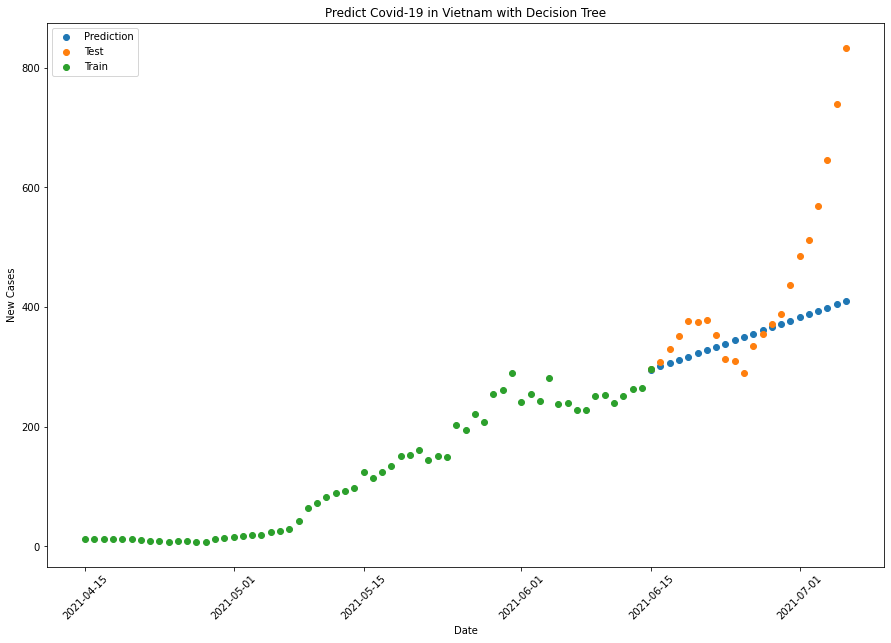

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Predict Covid-19 in " + country + " with Decision Tree")
plt.scatter(test.index,y_dtr_pred, label='Prediction')
plt.scatter(test.index,y0_test, label='Test')
plt.scatter(train.index,y0_train, label='Train')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend(loc="best")
plt.xticks(rotation=45)
plt.legend()
plt.savefig("DecicionTree_model.png")
plt.show()

# Random Forest Test

In [ ]:
rrf = RandomForestRegressor(n_estimators=100)
model_rrf = rrf.fit(x0_train, y0_train)
y_rrf_pred = model.predict(x0_test)
y_rrf_pred

array([[  4557.79078318],
       [  3556.42367082],
       [  2555.05655846],
       [  1553.6894461 ],
       [   552.32233374],
       [  -449.04477863],
       [ -1450.41189099],
       [ -2451.77900335],
       [ -3453.14611571],
       [ -4454.51322807],
       [ -5455.88034043],
       [ -6457.2474528 ],
       [ -7458.61456516],
       [ -8459.98167752],
       [ -9461.34878988],
       [-10462.71590224],
       [-11464.08301461],
       [-12465.45012697],
       [-13466.81723933],
       [-14468.18435169]])

In [ ]:
df_cpare_rrf = pd.DataFrame({'Actual': pd.DataFrame(y0_test)[0].values,'Prediction': pd.DataFrame(y_rrf_pred)[0].values})
df_cpare_rrf.head()

,Actual,Prediction
0,13561.571,4557.790783
1,12672.714,3556.423671
2,12079.571,2555.056558
3,11492.714,1553.689446
4,11534.429,552.322334


In [ ]:
print("The R^2 train score is: ", model.score(x0_train, y0_train))
print("The R^2 test score is: ", model.score(x0_test, y0_test))
print("MSE (in train): ", mean_squared_error(y0_train, model.predict(x0_train)))
print("MSE (in test): ", mean_squared_error(y0_test, y_rrf_pred))

The R^2 train score is:  0.9727496508819878
The R^2 test score is:  -623.1324607062643
MSE (in train):  8995944.619351529
MSE (in test):  331940753.3744095


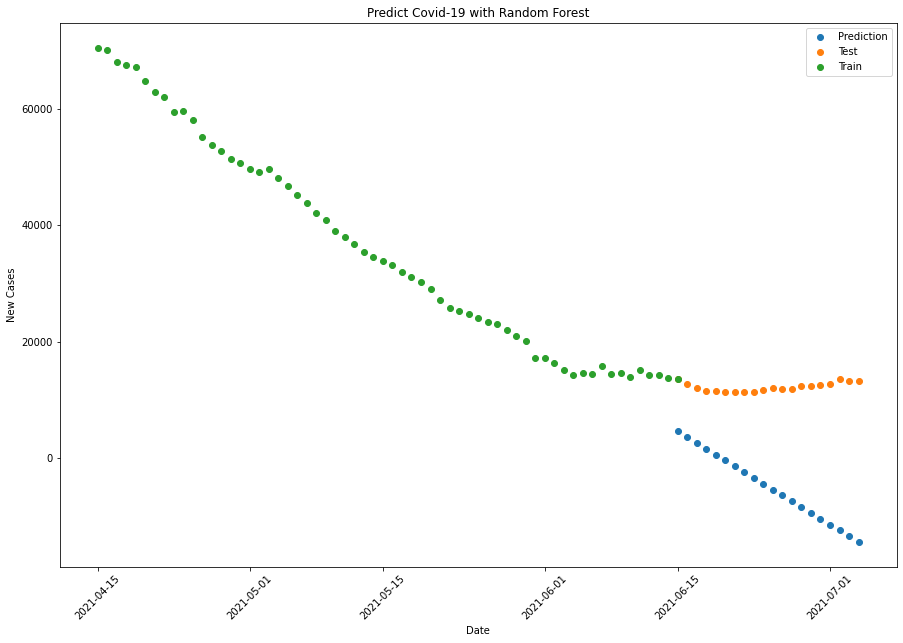

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Predict Covid-19 with Random Forest")
plt.scatter(test.index,y_rrf_pred, label='Prediction')
plt.scatter(test.index,y0_test, label='Test')
plt.scatter(train.index,y0_train, label='Train')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend(loc="best")
plt.xticks(rotation=45)
plt.legend()
plt.show()